In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
datahr=pd.read_csv(r"C:\Users\Abraham\Desktop\Solo\Bootcamp\portfolio\Human resources Analysis\CleanedHRdata.csv")

In [5]:
datahr.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
datahr.set_index("EmpID",inplace=True)

KeyError: "None of ['EmpID'] are in the columns"

In [12]:
datahr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1473 entries, RM297 to RM1210
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1473 non-null   int64  
 1   AgeGroup                  1473 non-null   object 
 2   Attrition                 1473 non-null   object 
 3   BusinessTravel            1473 non-null   object 
 4   DailyRate                 1473 non-null   int64  
 5   Department                1473 non-null   object 
 6   DistanceFromHome          1473 non-null   int64  
 7   Education                 1473 non-null   int64  
 8   EducationField            1473 non-null   object 
 9   EmployeeCount             1473 non-null   int64  
 10  EmployeeNumber            1473 non-null   int64  
 11  EnvironmentSatisfaction   1473 non-null   int64  
 12  Gender                    1473 non-null   object 
 13  HourlyRate                1473 non-null   int64  
 14  JobInvo

In [13]:
datahr.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'left_company'],
      dtype='object')

In [138]:
datahr.iloc[:, 10:21] 

,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab
EmpID,,,,,,,,,,,
RM297,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k
RM302,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k
RM458,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k
RM728,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k
RM829,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k
...,...,...,...,...,...,...,...,...,...,...,...
RM412,549,1,Female,41,3,5,Manager,1,Married,19566,15k+
RM428,573,3,Female,80,2,3,Sales Executive,1,Married,10266,10k-15k
RM537,732,1,Male,84,3,2,Sales Executive,1,Single,5405,5k-10k


## Let's check the attrition %

In [24]:
datahr["Attrition"].value_counts()

No     1236
Yes     237
Name: Attrition, dtype: int64

In [23]:
datahr["Attrition"].value_counts(normalize=True)

#16.0896 employees left, let's see why.

No     0.839104
Yes    0.160896
Name: Attrition, dtype: float64

## Age vs Attrition 

In [25]:
#let's find out if Age (AgeGroup actually) is a significant contribution to the attrition

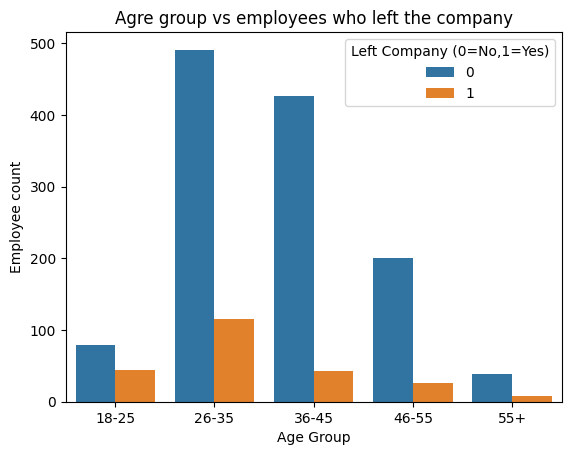

In [30]:
sns.countplot(x="AgeGroup", hue="left_company", data=datahr)
plt.title ("Agre group vs employees who left the company")
plt.xlabel("Age Group")
plt.ylabel("Employee count")
plt.legend(title="Left Company (0=No,1=Yes)")
plt.show()

In [45]:
datahr_perage = datahr.groupby("AgeGroup")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
datahr_perage

,AgeGroup,left_company,percentage
0,18-25,0,64.227642
1,18-25,1,35.772358
2,26-35,0,80.889621
3,26-35,1,19.110379
4,36-45,0,90.851064
5,36-45,1,9.148936
6,46-55,0,88.495575
7,46-55,1,11.504425
8,55+,0,82.978723
9,55+,1,17.021277


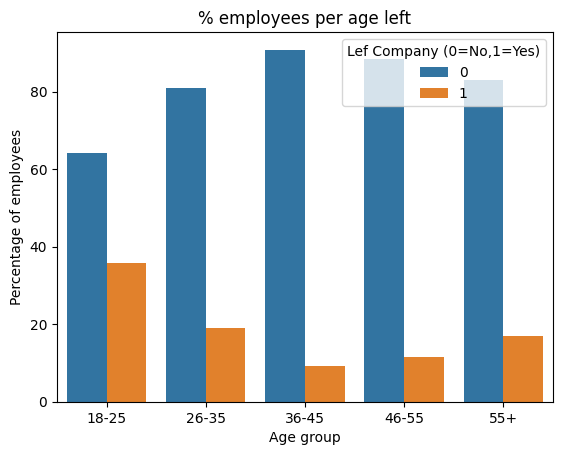

In [46]:
sns.barplot(x="AgeGroup",y="percentage", hue="left_company",data=datahr_perage)
plt.title("% employees per age left")
plt.xlabel("Age group")
plt.ylabel("Percentage of employees")
plt.legend(title="Lef Company (0=No,1=Yes)")
plt.show()



<p>Data shows that employees in age range 18-25 are more likely to leave 35.77, followed by 26-35 (19%) and +55 (17%). But why?</p>

## Business travel vs Attrition 

In [53]:
datahr_pertravel=datahr.groupby("BusinessTravel")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
datahr_pertravel

,BusinessTravel,left_company,percentage
0,Frequently,0,75.179856
1,Frequently,1,24.820144
2,No,0,92.000000
3,No,1,8.000000
4,Rarely,0,85.071770
5,Rarely,1,14.928230


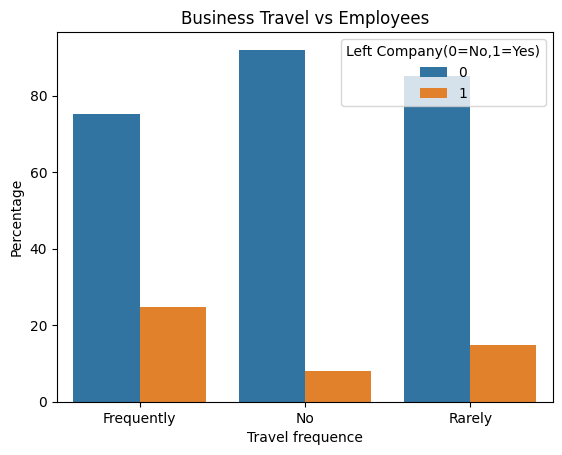

In [82]:
sns.barplot(x="BusinessTravel",y="percentage",hue="left_company",data=datahr_pertravel)
plt.title("Business Travel vs Employees")
plt.xlabel("Travel frequence")
plt.ylabel("Percentage")
plt.legend(title="Left Company(0=No,1=Yes)")
plt.show()

<p> Results show that the more frequent the employees travel for business the more likely they are to leave the company. Do younger employees travel more? Let's find out </p>

In [58]:
hrtravelperage=datahr.groupby("AgeGroup")["BusinessTravel"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
hrtravelperage

,AgeGroup,BusinessTravel,percentage
0,18-25,Rarely,75.609756
1,18-25,Frequently,13.821138
2,18-25,No,10.569106
3,26-35,Rarely,69.357496
4,26-35,Frequently,21.087315
5,26-35,No,9.555189
6,36-45,Rarely,68.723404
7,36-45,Frequently,18.936170
8,36-45,No,12.340426
9,46-55,Rarely,75.663717


In [63]:
hrtravelperagefrequent=hrtravelperage[hrtravelperage["BusinessTravel"]=="Frequently"].sort_values(by="percentage",ascending=False)
hrtravelperagefrequent

,AgeGroup,BusinessTravel,percentage
4,26-35,Frequently,21.087315
7,36-45,Frequently,18.936170
10,46-55,Frequently,16.814159
1,18-25,Frequently,13.821138
13,55+,Frequently,12.765957


<p>Data shows that Age Group 18-25 is far from being the group that travels the most, having one of the lowest percentages in frequent business travel.</p>

### DailyRate vs Attrition

In [69]:
datahr["DailyRate"].describe()

count    1473.000000
mean      802.659878
std       403.245460
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

In [70]:
#because the daily rate has too many different values and they all have a range between 102 and 1499, we decided to create a new column grouping daily rates in 4:
def rategrouping(i):
    if i <400:
        return "100-399"
    elif i>=400 and i<=800:
        return "400-799"
    elif i>=800 and i<=1200:
        return "800-1199"
    else:
        return "+1200"

In [71]:
datahr["Dayrate group"]=datahr["DailyRate"].apply(rategrouping)

In [73]:
datahr["Dayrate group"].unique()

array(['100-399', '800-1199', '+1200', '400-799'], dtype=object)

In [78]:
hrdayrate=datahr.groupby("Dayrate group")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
hrdayrate




,Dayrate group,left_company,percentage
0,+1200,0,86.645963
1,+1200,1,13.354037
2,100-399,0,80.333333
3,100-399,1,19.666667
4,400-799,0,82.949309
5,400-799,1,17.050691
6,800-1199,0,85.371703
7,800-1199,1,14.628297


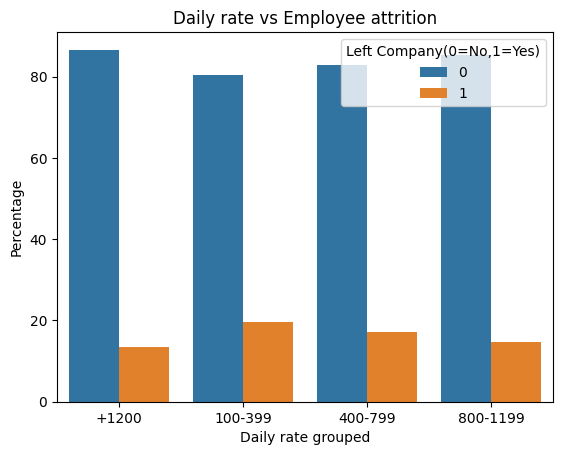

In [81]:
sns.barplot(x="Dayrate group", y="percentage", hue="left_company",data=hrdayrate)
plt.title("Daily rate vs Employee attrition")
plt.xlabel("Daily rate grouped")
plt.ylabel("Percentage")
plt.legend(title="Left Company(0=No,1=Yes)")
plt.show()

###  Department vs Attrition

In [88]:
departmenthr=datahr.groupby("Department")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
departmenthr

,Department,left_company,percentage
0,Human Resources,0,80.952381
1,Human Resources,1,19.047619
2,Research & Development,0,86.188993
3,Research & Development,1,13.811007
4,Sales,0,79.418345
5,Sales,1,20.581655


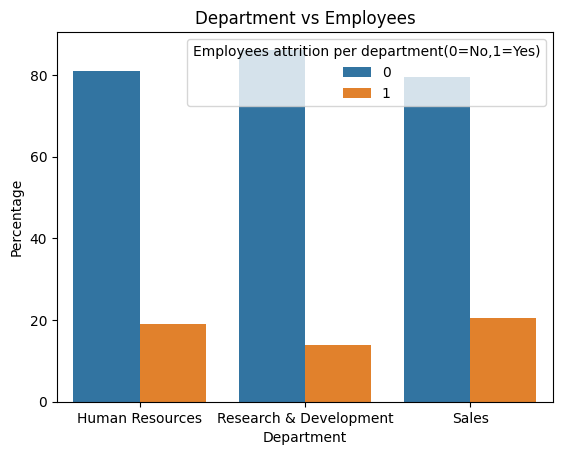

In [90]:
sns.barplot(x="Department",y="percentage",hue="left_company",data=departmenthr)
plt.title("Department vs Employees")
plt.xlabel("Department")
plt.ylabel("Percentage")
plt.legend(title="Employees attrition per department(0=No,1=Yes)")
plt.show()

In [ ]:
sns.barplot(x="BusinessTravel",y="percentage",hue="left_company",data=datahr_pertravel)
plt.title("Business Travel vs Employees")
plt.xlabel("Percentage")
plt.ylabel("Travel frequence")
plt.legend(title="Left Company(0=No,1=Yes)")
plt.show()

### Distance vs Attrition

In [110]:
def distancegroup(i):
    if i<11:
        return "1-10"
    elif i>=11 and i<21:
        return "11-20"
    else:
        return "21+"

In [111]:
datahr["distance grouped"]=datahr['DistanceFromHome'].apply(distancegroup)

In [114]:
disthr=datahr.groupby('distance grouped')["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
disthr

,distance grouped,left_company,percentage
0,1-10,0,85.992218
1,1-10,1,14.007782
2,11-20,0,80.000000
3,11-20,1,20.000000
4,21+,0,78.048780
5,21+,1,21.951220


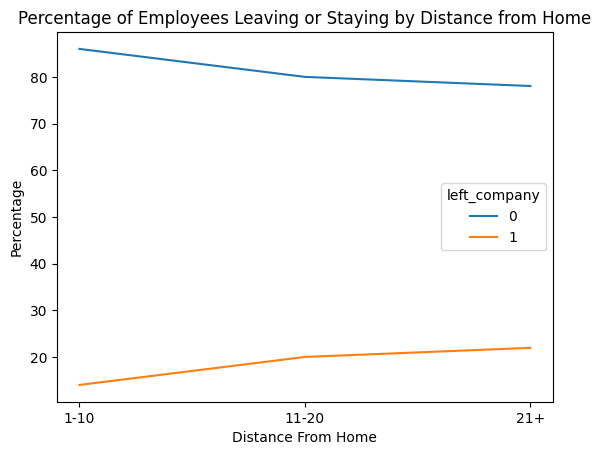

In [115]:
sns.lineplot(x="distance grouped", y="percentage", hue="left_company", data=disthr)

plt.title("Percentage of Employees Leaving or Staying by Distance from Home")
plt.xlabel("Distance From Home")
plt.ylabel("Percentage")
plt.show()


<p>The data suggests that when the distance from home exceeds 10, the likelihood of leaving the company increases from 14% to 20%. However, the percentage shows little variation beyond 20, rising only slightly to 21.9%, compared to the larger increase in the 10–20 range.</p>

### Eductation level vs Attrition

In [117]:
correlation_edu=datahr["Education"].corr(datahr["left_company"])
correlation_edu

-0.03052613750095787

<p>The results show that Education level has a weak impact</p>

### (Other) Numerical variables

In [137]:
datahr["StandardHours"].unique()
#StandardHours,'EmployeeCount', 'EmployeeNumber' are discarded from analysis since they don't provide useful data 


array([80], dtype=int64)

In [147]:
## These variables are numerical so we will check their correlation with attrition. We included Age and distance from home, despite having performed an individual analysis so to get a deeper understanding of the data:
numerical_variables= ["Age",'DistanceFromHome',"EnvironmentSatisfaction",'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',"left_company"]
correlation_matrix=datahr[numerical_variables].corr()
print(correlation_matrix["left_company"].sort_values(ascending=False))



left_company                1.000000
DistanceFromHome            0.077585
NumCompaniesWorked          0.043469
MonthlyRate                 0.014647
PerformanceRating           0.003268
HourlyRate                 -0.005593
PercentSalaryHike          -0.013827
YearsSinceLastPromotion    -0.032487
RelationshipSatisfaction   -0.045763
TrainingTimesLastYear      -0.059769
WorkLifeBalance            -0.064221
JobSatisfaction            -0.103276
EnvironmentSatisfaction    -0.104022
JobInvolvement             -0.129678
YearsAtCompany             -0.134106
StockOptionLevel           -0.136939
YearsWithCurrManager       -0.157813
Age                        -0.158775
MonthlyIncome              -0.159458
YearsInCurrentRole         -0.160302
JobLevel                   -0.168926
TotalWorkingYears          -0.170847
Name: left_company, dtype: float64


<p>The correlation analysis shows that none of these variables have a strong impact on employees' decisions to leave the company. Although not significant, the data suggests that, among the variables we calculated correlations for, 'Distance from Home' and 'Number of Companies Worked' are the most relevant factors influencing employees to leave. However, the correlations are weak, indicating that while these variables may make employees more likely to leave, their overall impact is low.

Distance from Home: 0.077585
Number of Companies Worked: 0.043469
Additionally, variables with negative correlations, such as age and monthly income, indicate that employees who are older or earn higher salaries are less likely to leave the company, which is consistent with expectations.</p>

### EnvironmentSatisfaction vs Attrition


In [151]:
Environmenthr=datahr.groupby("EnvironmentSatisfaction")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()


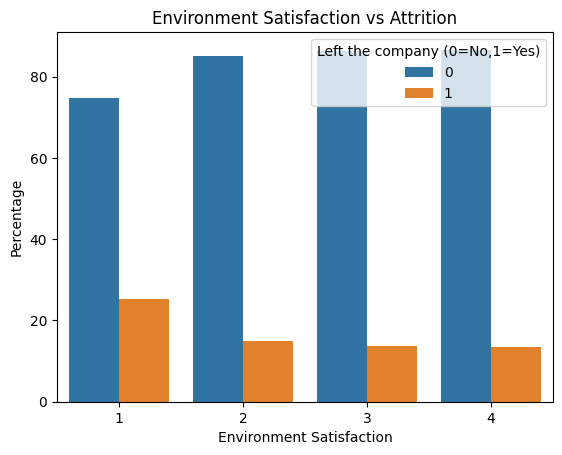

In [146]:
sns.barplot(x="EnvironmentSatisfaction", y="percentage", hue="left_company", data=Environmenthr)
plt.title("Environment Satisfaction vs Attrition")
plt.xlabel("Environment Satisfaction")
plt.ylabel("Percentage")
plt.legend(title="Left the company (0=No,1=Yes)")
plt.show()



In [148]:
Environmenthr

,EnvironmentSatisfaction,left_company,percentage
0,1,0,74.647887
1,1,1,25.352113
2,2,0,85.017422
3,2,1,14.982578
4,3,0,86.343612
5,3,1,13.656388
6,4,0,86.607143
7,4,1,13.392857


<p>The graphic shows that employees with a lower satisfaction are significantly more prone to leave, however, the likeness to leave the company shows no remarkable differences for other levels of environment satisfaction. We already tested this through the correlation calculation, which had a value of -0.10, meaning that higher the satisfaction the lower the attribution rate  </p>

### MaritalStatus vs Attrition


In [158]:
married=datahr.groupby("MaritalStatus")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
married

,MaritalStatus,left_company,percentage
0,Divorced,0,89.908257
1,Divorced,1,10.091743
2,Married,0,87.555556
3,Married,1,12.444444
4,Single,0,74.522293
5,Single,1,25.477707


In [157]:
married2=datahr.groupby("AgeGroup")["MaritalStatus"].value_counts().rename("percentage").reset_index()
married2

,AgeGroup,MaritalStatus,percentage
0,18-25,Single,51.219512
1,18-25,Married,36.585366
2,18-25,Divorced,12.195122
3,26-35,Married,44.151565
4,26-35,Single,33.443163
5,26-35,Divorced,22.405272
6,36-45,Married,47.234043
7,36-45,Single,28.297872
8,36-45,Divorced,24.468085
9,46-55,Married,51.769912


<p>The data shows that single employees have a higher likelihood of leaving (25.48%) compared to married (12.44%) and divorced employees (10.09%). However, when we examine age groups, we see that single individuals are more concentrated in the younger age groups (18–25 and 26–35), where we also observe the highest percentages in these age groups (51.22% and 33.44%, respectively). Since younger age groups typically have higher turnover rates, the higher attrition among single employees could be more a reflection of their age distribution than of their marital status itself.</p>

### EducationField vs Attrition

In [172]:
edufielddata=datahr.groupby("EducationField")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
edufielddata

,EducationField,left_company,percentage
0,Human Resources,0,74.074074
1,Human Resources,1,25.925926
2,Life Sciences,0,85.313531
3,Life Sciences,1,14.686469
4,Marketing,0,77.987421
5,Marketing,1,22.012579
6,Medical,0,86.480687
7,Medical,1,13.519313
8,Other,0,86.746988
9,Other,1,13.253012


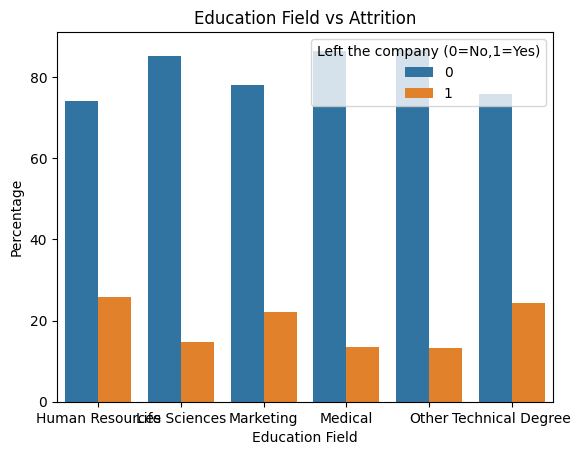

In [173]:
sns.barplot(x="EducationField", y="percentage", hue="left_company", data=edufielddata)
plt.title("Education Field vs Attrition")
plt.xlabel("Education Field")
plt.ylabel("Percentage")
plt.legend(title="Left the company (0=No,1=Yes)")
plt.show()

<p>The data shows that employees who have studied a degree in Human Resources, Marketing or a Technical degree are more likely to leave the company</p>

 ### Gender vs Attrition

In [161]:
genderdata=datahr.groupby("Gender")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
genderdata

,Gender,left_company,percentage
0,Female,0,85.229202
1,Female,1,14.770798
2,Male,0,83.031674
3,Male,1,16.968326


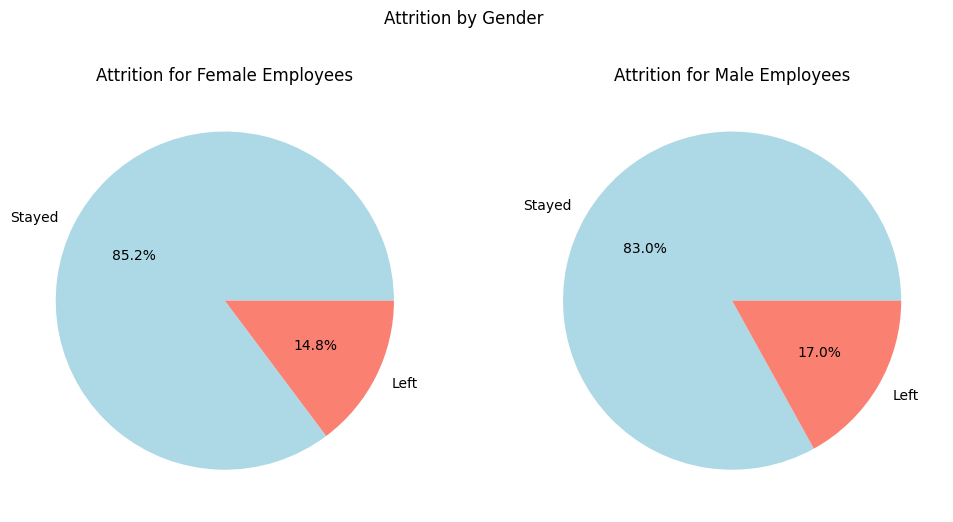

In [171]:

# data for each gender
male_data = genderdata[genderdata["Gender"] == "Male"]
female_data = genderdata[genderdata["Gender"] == "Female"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Females
axes[0].pie(female_data["percentage"], labels=["Stayed", "Left"], autopct="%1.1f%%", colors=["lightblue", "salmon"])
axes[0].set_title("Attrition for Female Employees")

# Males
axes[1].pie(male_data["percentage"], labels=["Stayed", "Left"], autopct="%1.1f%%", colors=["lightblue", "salmon"])
axes[1].set_title("Attrition for Male Employees")

plt.suptitle("Attrition by Gender")
plt.show()

<p>Male employees have a higher rate of attrition (17%vs14.8), however, given the small difference, gender does not appear to be a significant factor in determining wether an employee leaves the company.</p>

In [64]:
datahr.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'left_company'],
      dtype='object')

In [ ]:
list=['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

<p>Individual results show that employees that leave the company belong to these subgroups:

-Age group 18-25
-High travel frequence
-Lower daily rate
-Sales and & HHRR  (20.5&19.0%)
-Distance +10

Non relevant variables for attrition:
-Gender
-Marital status


</p>

# Going even further: transforming all object variables into binary